data source: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston


updated: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system


Features de Dia e Noite durate o ano em Boston,MA.
https://www.timeanddate.com/sun/usa/boston


Dados Climáticos fornecidos pela NOAA (National Oceanic and Atmospheric Administration). A NOAA é um órgão para assuntos sobre meteorologia, oceanos, atmosfera e clima, advertindo sobre perigos no tempo e mares, guia o uso e a proteção do oceano e de recursos litorâneos, e conduzem pesquisas para melhorar a compreensão do meio ambiente (https://pt.wikipedia.org/wiki/Administra%C3%A7%C3%A3o_Oce%C3%A2nica_e_Atmosf%C3%A9rica_Nacional). 

https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table
https://www.ncdc.noaa.gov/cdo-web/search



Exemplos
Oleksandr Kosovan
https://www.kaggle.com/kosovanolexandr/crimes-in-boston-multiclass-clustering

rgriffin
https://www.kaggle.com/heesoo37/boston-crimes-starter-eda

In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from workalendar.usa import UnitedStates
from datetime import datetime




In [2]:
#crimes = pd.read_parquet('crime.parquet')

crimes = pd.read_csv('crime.csv')
offense_codes = pd.read_csv('offense_codes.csv', encoding = "ISO-8859-1")
boston_noaa = pd.read_csv('2012098.csv', encoding = "ISO-8859-1")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
crimes.info()

### Data wrangling/Data munging

1. Split do campo de timestamp do dataset de crimes para utilização posterior e transformação em Hash para utilização em merges.

In [3]:
new = crimes["OCCURRED_ON_DATE"].str.split(" ", n = 1, expand = True) 
crimes["DdMmYy"]= new[0] 
crimes["HsMnSg"]= new[1]

# hash
crimes['hash'] = crimes['DdMmYy'].apply(hash)

# Drop das colunas temporarias usadas
crimes.drop(columns =["DdMmYy","HsMnSg"], inplace = True) 


2. Conversão campo OCCURRED_ON_DATE de string para timestamp

In [4]:
crimes['OCCURRED_ON_DATE'] = pd.to_datetime(crimes['OCCURRED_ON_DATE'])

3. Criação de campo com hash da data para marge com os dados de crimes e ocorrências

In [5]:
boston_noaa.drop(columns =["STATION","NAME"], inplace = True) 
# hash
boston_noaa['hash'] = boston_noaa['DATE'].apply(hash)


In [6]:
boston_noaa

,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,hash
0,2015-06-14,0.00,NaN,70,74,62,-2921902915665104107
1,2015-06-15,0.40,NaN,58,63,54,-8452596588912614467
2,2015-06-16,0.00,NaN,59,71,56,7256902690820061429
3,2015-06-17,0.00,NaN,66,69,59,-3774020139615754689
4,2015-06-18,0.00,NaN,65,76,57,8561709173484276372
...,...,...,...,...,...,...,...
1677,2020-01-16,0.10,NaN,42,47,30,7199250700675343214
1678,2020-01-17,0.00,NaN,25,30,16,5942908819915253321
1679,2020-01-18,0.28,NaN,18,33,14,-4819138499877504187
1680,2020-01-19,0.02,NaN,33,45,24,-1455520885710012656


4. Cruzamento dos de ocorrência com códigos e descrições

In [7]:
crimes['CODE'] = crimes['OFFENSE_CODE']

crime_code = pd.merge(crimes, offense_codes, on="CODE", how="left")

crime_code.drop(columns =["OFFENSE_CODE"], inplace = True) 

### Data Analysis

Qual é o local da cidade com maior quantidade de ocorrências. Pode ser rua, avenida ou outro tipo.

In [8]:
crime_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455910 entries, 0 to 455909
Data columns (total 19 columns):
INCIDENT_NUMBER        455910 non-null object
OFFENSE_CODE           455910 non-null int64
OFFENSE_CODE_GROUP     426839 non-null object
OFFENSE_DESCRIPTION    455910 non-null object
DISTRICT               453603 non-null object
REPORTING_AREA         455910 non-null object
SHOOTING               30817 non-null object
OCCURRED_ON_DATE       455910 non-null datetime64[ns]
YEAR                   455910 non-null int64
MONTH                  455910 non-null int64
DAY_OF_WEEK            455910 non-null object
HOUR                   455910 non-null int64
UCR_PART               426729 non-null object
STREET                 440634 non-null object
Lat                    428184 non-null float64
Long                   428184 non-null float64
Location               455910 non-null object
hash                   455910 non-null int64
CODE                   455910 non-null int64
dtypes: date

In [9]:
offense_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
CODE    576 non-null int64
NAME    576 non-null object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


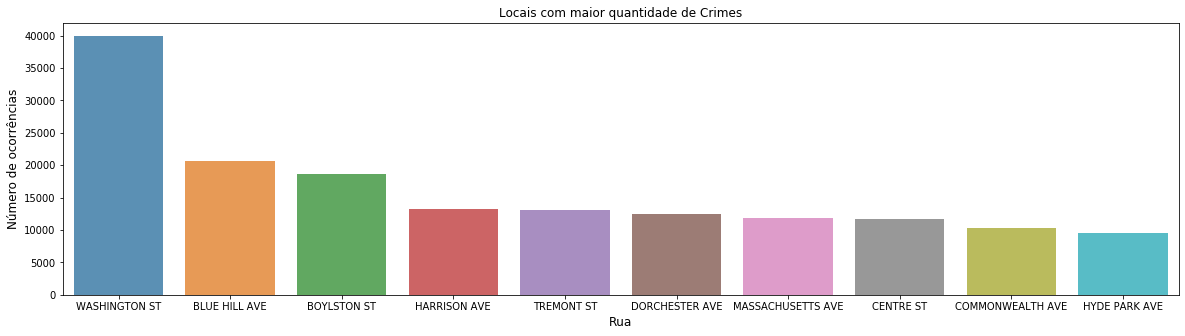

In [10]:
crime_count  = crime_code['STREET'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Locais com maior quantidade de Crimes')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Rua', fontsize=12)
plt.show()

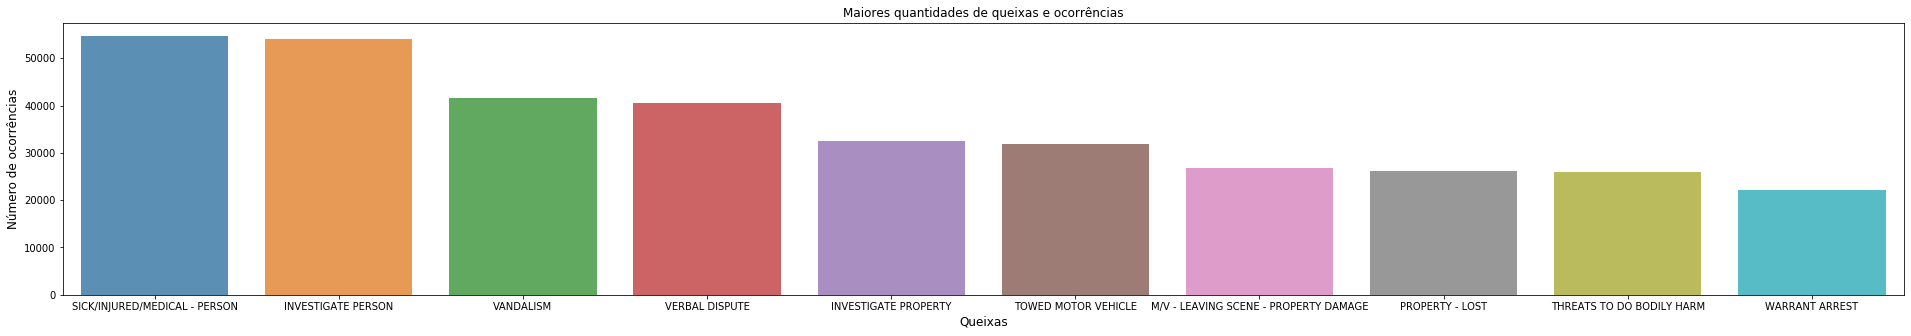

In [11]:
crime_count  = crime_code['NAME'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(33,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Maiores quantidades de queixas e ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Queixas', fontsize=12)
plt.show()

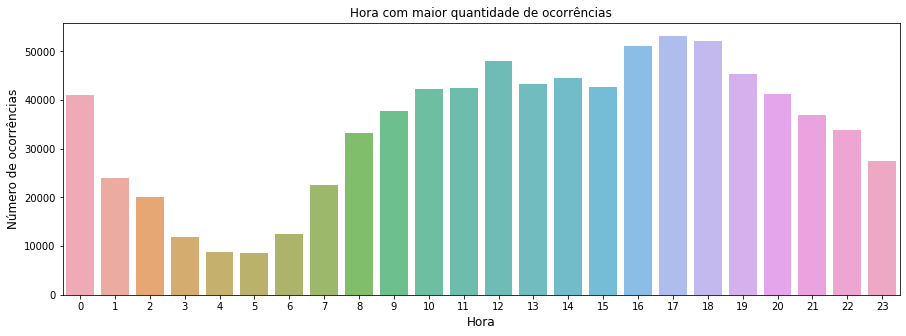

In [12]:
crime_count  = crime_code['HOUR'].value_counts()
crime_count = crime_count[:24,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Hora com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.show()

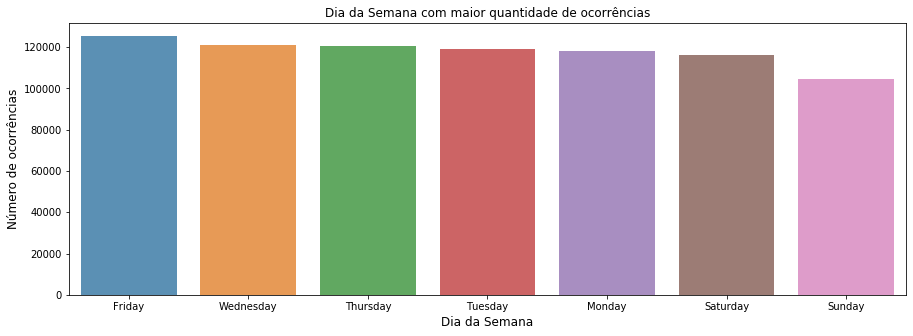

In [13]:
crime_count  = crime_code['DAY_OF_WEEK'].value_counts()
crime_count = crime_count[:7,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Dia da Semana com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Dia da Semana', fontsize=12)
plt.show()

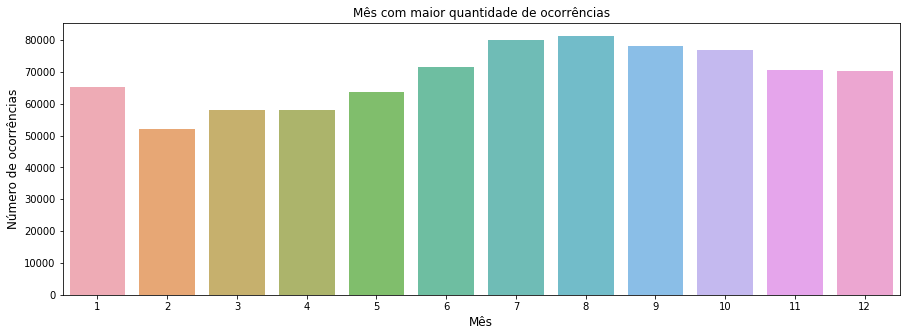

In [14]:
crime_count  = crime_code['MONTH'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Mês com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.show()

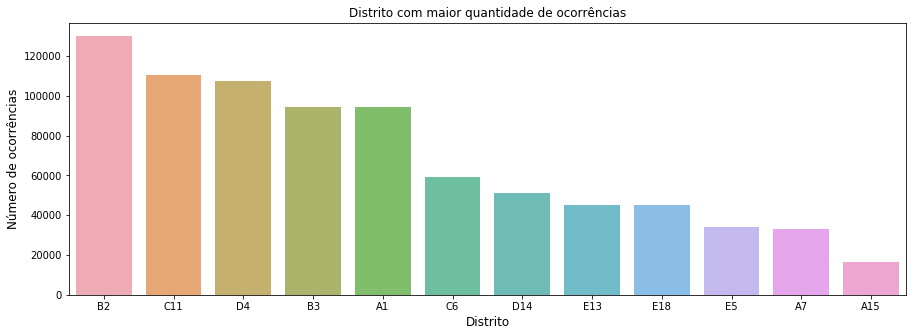

In [15]:
crime_count  = crime_code['DISTRICT'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Distrito com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Distrito', fontsize=12)
plt.show()

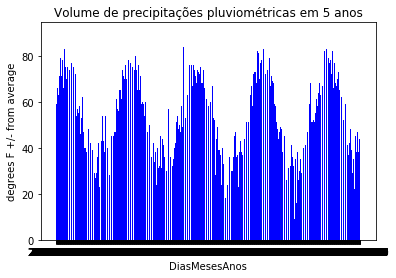

In [18]:
plt.title("Volume de precipitações pluviométricas em 5 anos")
plt.xlabel("DiasMesesAnos")
plt.ylabel("degrees F +/- from average")
plt.bar(boston_noaa['DATE'], boston_noaa['TAVG'], color='blue')
plt.show()

Distribuição das ocorrências em um mapa da cidade de Boston. No gráfico demostra a ocorrência em Latitude e Longitude.

In [ ]:
location_shoot = crimes[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x_shoot, y_shoot, kind='scatter')
#sns.jointplot(x_shoot, y_shoot, kind='reg')
#sns.jointplot(x_shoot, y_shoot, kind='resid')
#sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')

### Feature Engeneering

Criação de features interessantes que poder ser utilizadas na interpretação de eventos e que poderão ser úteis no para o modelo. 

#### Dia e Noite

A primeira que será criada é Dia ou Noite, ou seja, a ocorrêcia se deu em durante o dia ou durante a noite.

1.Definição das variáveis como valores padrões

In [25]:
crime_code['Day'] = 0
crime_code['Night'] = 0

2.Marcação dos dados

In [26]:
# Day or night for 1st month
crime_code['Day'].loc[(crime_code['MONTH'] == 1) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 18)] = 1

# Day or night for 2st month
crime_code['Day'].loc[(crime_code['MONTH'] == 2) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 19)] = 1

# for 3st month
crime_code['Day'].loc[(crime_code['MONTH'] == 3) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 4st month
crime_code['Day'].loc[(crime_code['MONTH'] == 4) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 5st month
crime_code['Day'].loc[(crime_code['MONTH'] == 5) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 6st month
crime_code['Day'].loc[(crime_code['MONTH'] == 6) & (crime_code['HOUR'] >= 4) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 7st month
crime_code['Day'].loc[(crime_code['MONTH'] == 7) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 8st month
crime_code['Day'].loc[(crime_code['MONTH'] == 8) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 9st month
crime_code['Day'].loc[(crime_code['MONTH'] == 9) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 10st month
crime_code['Day'].loc[(crime_code['MONTH'] == 10) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 19)] = 1

# Day or night for 11st month
crime_code['Day'].loc[(crime_code['MONTH'] == 11) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 17)] = 1

# Day or night for 12st month
crime_code['Day'].loc[(crime_code['MONTH'] == 12) & (crime_code['HOUR'] >= 7) & (crime_code['HOUR'] <= 17)] = 1


3.Marcação dos dados, quando for noite marca 1.

In [27]:
crime_code['Night'].loc[crime_code['Day']==0]=1

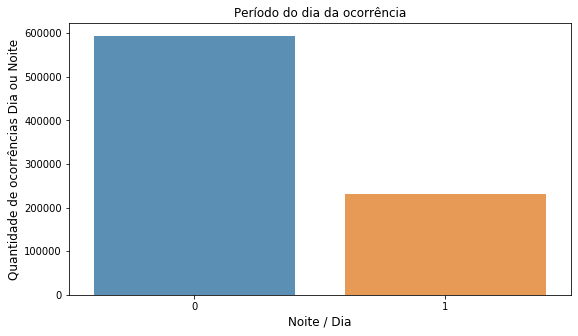

In [28]:
crime_count  = crime_code['Night'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(9,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Período do dia da ocorrência')
plt.ylabel('Quantidade de ocorrências Dia ou Noite', fontsize=12)
plt.xlabel('Noite / Dia', fontsize=12)
plt.show()

#### Feriados Nacionais

A segunda feature que será criada é Feriados (Holidays), a experiência policial afirma que grande parte das ocorrências ocorrem nos feriados. São diversas classes de eventos que podem ser classificados dos mais brandos a o mais graves. Os feriados nacionais em questão são dos Estados Unidos da Américas (USA), no Estado de Massachusetts acrescenta o Patriot's Day, dia em que ocorre a Boston Marathon.

In [29]:
cal = UnitedStates()

start = crime_code['OCCURRED_ON_DATE'].min()
start_year = start.year  # Assuming dates are Timestamp objects.
end = crime_code['OCCURRED_ON_DATE'].max()
end_year = end.year 

holidays = set(holiday[0] 
               for year in range(start_year, end_year + 1)
               for holiday in cal.holidays(year)
               if start.date() <= holiday[0] <= end.date())

crimes['Holiday'] = crime_code['OCCURRED_ON_DATE'].isin(holidays)

### https://stackoverflow.com/questions/57403835/pandas-using-workalendar-to-check-if-a-date-is-a-holiday-and-assigning-boolean?noredirect=1&lq=1

#### Informações Climáticas

In [30]:
boston_noaa.drop(columns =["DATE"], inplace = True) 
data_noaa_boston = pd.merge(crime_code, boston_noaa, on="hash", how="left")

KeyError: "['DATE'] not found in axis"

In [31]:
data_noaa_boston

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,hash,CODE,Day,Night,Holiday,PRCP,SNWD,TAVG,TMAX,TMIN
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,...,-6673749431235165325,423,0,1,False,0.53,NaN,54,63,46
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,...,-5696514194592867247,3301,0,1,False,0.00,NaN,23,33,17
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,...,2875787278229279061,3115,0,1,False,0.42,NaN,61,70,53
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,...,1807267328962049023,3126,1,0,False,0.09,NaN,48,56,39
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,...,2084109179309942876,3005,0,1,False,0.40,NaN,52,58,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455905,120200242,3115,NaN,INVESTIGATE PERSON,D4,167,0,2020-01-05 00:00:00,2020,1,...,-4643302127451433403,3115,0,1,False,0.11,NaN,39,41,32
455906,120200013,2403,NaN,DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATH...,A1,84,0,2020-01-01 01:02:00,2020,1,...,-7857699504478851962,2403,0,1,False,0.00,NaN,39,43,36
455907,102096818,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,A1,,0,2019-11-30 21:00:00,2019,11,...,7616453087075541518,3126,0,1,False,0.00,NaN,33,39,26
455908,102095489,3115,NaN,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,...,5635383585482463945,3115,1,0,False,0.00,NaN,46,54,41


In [32]:
data_noaa_boston.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,hash,CODE,Day,Night,PRCP,SNWD,TAVG,TMAX,TMIN
count,455910.000000,455910.000000,455910.000000,455910.000000,428184.000000,428184.000000,4.559100e+05,455910.000000,455910.000000,455910.000000,455910.000000,214.0,455910.000000,455910.000000,455910.000000
mean,2331.077570,2017.224022,6.819971,13.099491,42.228149,-70.931175,-9.652133e+16,2331.077570,0.720774,0.279226,0.115542,0.0,54.668185,62.458020,47.464960
std,1182.519318,1.343762,3.373510,6.317138,2.014842,3.259313,5.388019e+18,1182.519318,0.448619,0.448619,0.291204,0.0,16.853266,18.084856,16.491051
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674,-9.218988e+18,111.000000,0.000000,0.000000,0.000000,0.0,0.000000,10.000000,-9.000000
25%,1102.000000,2016.000000,4.000000,9.000000,42.297027,-71.097348,-4.844384e+18,1102.000000,0.000000,0.000000,0.000000,0.0,40.000000,48.000000,35.000000
50%,3002.000000,2017.000000,7.000000,14.000000,42.325538,-71.077667,-2.129754e+17,3002.000000,1.000000,0.000000,0.000000,0.0,55.000000,63.000000,48.000000
75%,3201.000000,2018.000000,10.000000,18.000000,42.348529,-71.062567,4.549584e+18,3201.000000,1.000000,1.000000,0.070000,0.0,70.000000,77.000000,62.000000
max,3831.000000,2020.000000,12.000000,23.000000,42.395042,0.000000,9.220009e+18,3831.000000,1.000000,1.000000,2.680000,0.0,90.000000,98.000000,83.000000


In [33]:
data_noaa_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455910 entries, 0 to 455909
Data columns (total 27 columns):
INCIDENT_NUMBER        455910 non-null object
OFFENSE_CODE           455910 non-null int64
OFFENSE_CODE_GROUP     426839 non-null object
OFFENSE_DESCRIPTION    455910 non-null object
DISTRICT               453603 non-null object
REPORTING_AREA         455910 non-null object
SHOOTING               30817 non-null object
OCCURRED_ON_DATE       455910 non-null datetime64[ns]
YEAR                   455910 non-null int64
MONTH                  455910 non-null int64
DAY_OF_WEEK            455910 non-null object
HOUR                   455910 non-null int64
UCR_PART               426729 non-null object
STREET                 440634 non-null object
Lat                    428184 non-null float64
Long                   428184 non-null float64
Location               455910 non-null object
hash                   455910 non-null int64
CODE                   455910 non-null int64
Day         

In [ ]:
offense_codes